In [ ]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
data_paths = glob('/content/gdrive/My Drive/fastcampus/cifar/train/*.png')#모든 파일의 절대경로를 다 가져옴
len(data_paths)

50000

In [ ]:
path = data_paths[0]
path

'/content/gdrive/My Drive/fastcampus/cifar/train/40572_dog.png'

In [ ]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype = tf.float32)

image.shape

TensorShape([32, 32, 3])

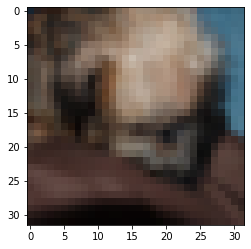

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
def read_image(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile, dtype = tf.float32)
  return image

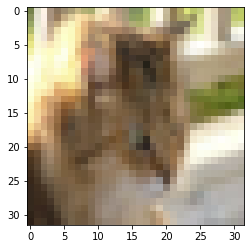

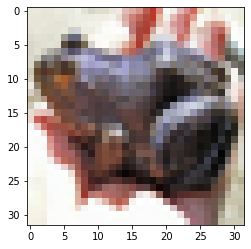

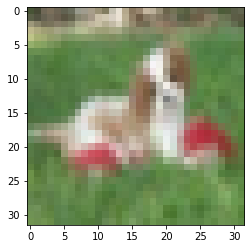

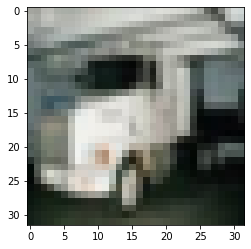

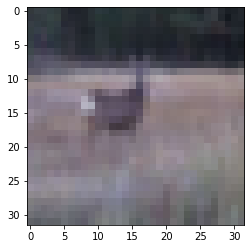

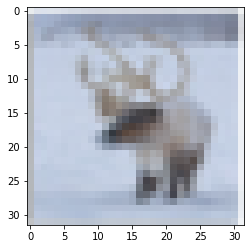

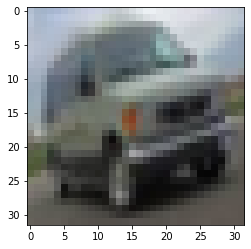

In [ ]:
for i in range(1,8):#1이상 8이하
  plt.imshow(read_image(data_paths[i]))
  plt.show()

In [ ]:
#batch_size는 메모리 문제가 제일 크다.
#1epoch당 batchsize만큼 준다.
batch_images=[]#포개서 하나의 데이터셋으로 여기에 넣을거당.
for path in data_paths[:8]:
  image = read_image(path)
  batch_images.append(image)

In [ ]:
len(batch_images)

8

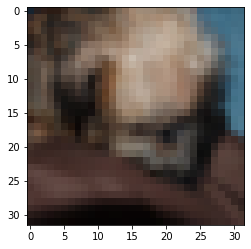

In [ ]:
plt.imshow(batch_images[0])
plt.show()

In [ ]:
#차원을 하나 추가해야한다.
np.array(batch_images).shape#이러면 하나의 array가 되는데 사이즈가 다 똑같아야함.

(8, 32, 32, 3)

In [ ]:
batch = tf.convert_to_tensor(batch_images)

In [ ]:
batch.shape#이미지 사이즈 같아야한다.

TensorShape([8, 32, 32, 3])

In [ ]:
#(batch_size, height, width, channel)
#정리
def make_batch(batch_paths):
  batch_images = []

  for path in data_paths:
    image = read_image(path)
    #image = cv2.resize(image, (32,32))
    batch_images.append(image)

  return tf.convert_to_tensor(batch_images)

#하면 TensorShape([8, 32, 32, 3]) 요게 나온다.

In [ ]:
batch_images = make_batch(data_paths[:8])

KeyboardInterrupt: ignored

#데이터 generator


In [ ]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_paths = glob('/content/gdrive/My Drive/fastcampus/mnist_png/training/0/*.png')
data_paths[0]

'/content/gdrive/My Drive/fastcampus/mnist_png/training/0/47372.png'

In [ ]:
path = data_paths[0]
path

'/content/gdrive/My Drive/fastcampus/mnist_png/training/0/47372.png'

In [ ]:
data_paths = tf.io.matching_files('/content/gdrive/My Drive/fastcampus/mnist_png/training/0/*.png')#이게 나을 수도 있다.
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'/content/gdrive/My Drive/fastcampus/mnist_png/training/0/1.png'>

In [ ]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'/content/gdrive/My Drive/fastcampus/mnist_png/training/0/1.png'>

In [ ]:
gfile = tf.io.read_file(path)

image = tf.io.decode_image(gfile)

In [ ]:
image.shape

TensorShape([28, 28, 1])

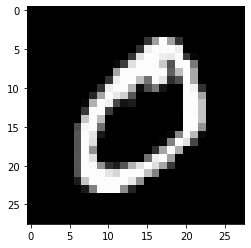

In [ ]:
plt.imshow(image[:,:,0],'gray')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    #전처리 할 것 들을 넣어주는 것임
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [ ]:
image.shape

TensorShape([28, 28, 1])

In [ ]:
inputs = image[tf.newaxis,...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [ ]:

image = next(iter(datagen.flow(inputs)))

In [ ]:
image.shape

(1, 28, 28, 1)

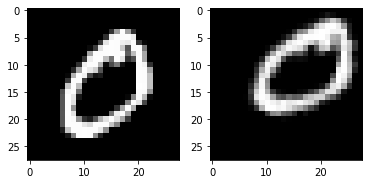

In [ ]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs),'gray')


plt.subplot(122)
plt.imshow(np.squeeze(image),'gray')
#변화가 느껴지시나용!!
plt.show()

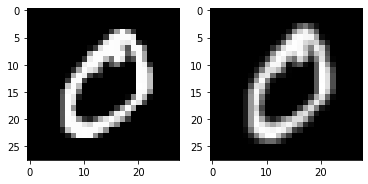

In [ ]:
datagen = ImageDataGenerator(
  #width_shift_range = 0.3     #방향, 간격은 랜덤
  #zoom_range = 0.3  #위아래 늘리거나 좌우 늘리거나 등등 랜덤
  #preprocessing_function = lambda() 이런식으로도 가능
)#IDG에서 load하는 기능이 있다.근데 일단 대기
outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.imshow(np.squeeze(inputs),'gray')

plt.subplot(122)
plt.imshow(np.squeeze(outputs),'gray')

plt.show()

#rescale시 주의 사항

In [ ]:
#testset에는 하지 말것!!!!!!
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1/255
)

test_datagen = ImageDataGenerator(rescale = 1/255)